# Hamoye Premier Project.

## Group Catboost 

### Dataset Description

> The Association of Tennis Professionals (ATP) is the governing body of the men's professional tennis circuits; this project uses a total of 17 datasets.In these datasets there are individual csv files for ATP tournament from 2000 to 2017.
The numbers in the last columns are absolute values, using them you can calculate percentages.

the following is the naming abbrevations of the column names used in the data.

ace = absolute number of aces

df = number of double faults

svpt = total serve points

1stin = 1st serve in

1st won = points won on 1st serve

2ndwon = points won on 2nd serve

SvGms = serve games

bpSaved = break point saved

bpFaced = break point faced


### Question(s) For Analysis

>- Who is the greatest Tennis player of all time?
>- What makes a great Tennis player?

In [42]:
import numpy as np
import pandas as pd
from scipy import stats
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams

%matplotlib inline

In [77]:
#Loading datasets from folder called 'datasets' and merging all csv data
folder_name = '../datasets'
files = glob.glob(os.path.join(folder_name, "*.csv"))
df = pd.concat((pd.read_csv(f, low_memory=False) for f in files), ignore_index = True)

### Preliminary Wrangling

In [3]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32.0,A,20000501.0,1.0,102179.0,NaN,NaN,...,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000-717,Orlando,Clay,32.0,A,20000501.0,2.0,103602.0,NaN,Q,...,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000-717,Orlando,Clay,32.0,A,20000501.0,3.0,103387.0,NaN,NaN,...,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000-717,Orlando,Clay,32.0,A,20000501.0,4.0,101733.0,NaN,NaN,...,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000-717,Orlando,Clay,32.0,A,20000501.0,5.0,101727.0,4.0,NaN,...,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0


In [4]:
df.shape

(53571, 49)

In [5]:
df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,53508.000000,5.350800e+04,53508.000000,53508.000000,22305.000000,50001.000000,53490.000000,52432.000000,52432.000000,53508.000000,...,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000
mean,53.244431,2.007903e+07,38.743029,104044.714005,7.262990,185.624308,26.030216,82.360047,1523.461913,104182.875458,...,5.040008,4.997947,3.384311,80.471093,47.857750,31.845140,14.994009,12.218789,4.767176,8.646732
std,38.951310,4.938173e+04,59.206285,2338.649843,6.669687,6.793573,3.657063,146.217219,1998.389560,3324.481911,...,4.035421,4.773229,2.529890,29.170992,19.135274,14.292082,7.277628,4.220815,3.259114,4.128620
min,4.000000,2.000010e+07,1.000000,100644.000000,1.000000,163.000000,15.715264,1.000000,1.000000,100644.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.004012e+07,8.000000,103252.000000,3.000000,180.000000,23.362081,17.000000,535.000000,103171.000000,...,2.000000,2.000000,2.000000,59.000000,34.000000,22.000000,10.000000,9.000000,2.000000,6.000000
50%,32.000000,2.008030e+07,20.000000,103909.000000,5.000000,185.000000,25.937029,44.000000,893.000000,103908.000000,...,4.000000,4.000000,3.000000,75.000000,45.000000,30.000000,14.000000,11.000000,4.000000,8.000000
75%,64.000000,2.012062e+07,39.000000,104676.000000,9.000000,190.000000,28.560575,86.000000,1615.000000,104678.000000,...,7.000000,7.000000,5.000000,96.000000,58.000000,40.000000,19.000000,15.000000,7.000000,11.000000
max,128.000000,2.017020e+07,319.000000,202382.000000,35.000000,208.000000,39.627652,2101.000000,16950.000000,202359.000000,...,30.000000,103.000000,23.000000,489.000000,328.000000,284.000000,101.000000,91.000000,25.000000,34.000000


## Quality Issues

- Bad date format/datatype
- Bad data types for winner_age, winner_rank, and winner_rank_points columns
- null values present


In [78]:
# changing tourney_date format and datatype
df['tourney_date'] = df['tourney_date'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y%m%d', errors= 'coerce'))

In [79]:
#displays enire column of the dataframe
pd.set_option('display.max.column', None)

In [5]:
df.sample(15)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
1977,2000-416,Rome Masters,Clay,64.0,M,2000-05-08,63.0,102796.0,3.0,NaN,Magnus Norman,R,188.0,SWE,23.939767,4.0,2314.0,102856.0,4.0,NaN,Gustavo Kuerten,R,190.0,BRA,23.657769,6.0,2012.0,6-3 4-6 6-4 6-4,5.0,F,185.0,14.0,1.0,121.0,81.0,57.0,21.0,20.0,5.0,9.0,15.0,5.0,142.0,68.0,48.0,34.0,19.0,15.0,21.0
4531,2001-891,Chennai,Hard,32.0,A,2001-01-01,14.0,102911.0,NaN,NaN,Andrei Stoliarov,R,178.0,RUS,23.978097,NaN,NaN,102405.0,NaN,WC,Mahesh Bhupathi,R,185.0,IND,26.570842,NaN,NaN,3-6 6-2 7-6(2),3.0,R32,120.0,3.0,5.0,97.0,41.0,29.0,31.0,14.0,5.0,8.0,18.0,3.0,120.0,67.0,45.0,23.0,15.0,9.0,13.0
6829,2002-73,Tashkent,Hard,32.0,A,2002-09-09,11.0,102694.0,NaN,NaN,Lars Burgsmuller,R,183.0,GER,26.759754,79.0,493.0,103715.0,NaN,Q,Kirill Ivanov Smolensky,R,NaN,RUS,21.552361,544.0,35.0,4-6 6-0 6-2,3.0,R32,112.0,11.0,2.0,83.0,50.0,37.0,16.0,12.0,5.0,7.0,9.0,5.0,99.0,61.0,33.0,17.0,12.0,12.0,18.0
39295,2012-339,Brisbane,Hard,32.0,A,2012-01-01,15.0,105902.0,NaN,WC,James Duckworth,R,183.0,AUS,19.947981,275.0,171.0,103917.0,NaN,NaN,Nicolas Mahut,R,190.0,FRA,29.946612,80.0,653.0,6-4 6-4,3.0,R32,71.0,5.0,1.0,52.0,31.0,25.0,12.0,10.0,1.0,3.0,5.0,5.0,52.0,32.0,21.0,9.0,10.0,3.0,7.0
17757,2005-316,Bastad,Clay,32.0,A,2005-07-04,28.0,103181.0,NaN,NaN,Jiri Vanek,R,185.0,CZE,27.195072,105.0,402.0,103169.0,NaN,NaN,Oscar Hernandez,R,180.0,ESP,27.233402,80.0,488.0,6-4 6-2,3.0,QF,100.0,5.0,2.0,59.0,33.0,26.0,15.0,9.0,4.0,4.0,0.0,3.0,75.0,47.0,33.0,9.0,9.0,4.0,7.0
35216,2010-D060,Davis Cup G2 PO: MAS vs POC,Hard,4.0,D,2010-07-09,2.0,104702.0,NaN,NaN,Michael Leong,U,NaN,SOL,24.298426,1274.0,3.0,108961.0,NaN,NaN,Abd Hazli Bin Zainuddin,U,NaN,MAS,29.664613,NaN,NaN,6-1 6-0 6-1,5.0,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22028,2006-568,St. Petersburg,Carpet,32.0,A,2006-10-23,21.0,103018.0,NaN,NaN,Max Mirnyi,R,196.0,BLR,29.297741,60.0,645.0,102318.0,NaN,NaN,Andrei Pavel,R,183.0,ROU,32.736482,106.0,393.0,6-3 7-5,3.0,R16,86.0,16.0,2.0,58.0,38.0,30.0,15.0,11.0,0.0,0.0,2.0,2.0,73.0,52.0,33.0,11.0,10.0,3.0,5.0
41840,2013-540,Wimbledon,Grass,128.0,G,2013-06-24,18.0,105138.0,NaN,NaN,Roberto Bautista Agut,R,NaN,ESP,25.193703,60.0,778.0,104559.0,NaN,Q,Teymuraz Gabashvili,R,188.0,RUS,28.087611,137.0,404.0,6-3 6-4 7-6(3),5.0,R128,149.0,6.0,1.0,117.0,88.0,63.0,16.0,16.0,6.0,8.0,5.0,5.0,106.0,62.0,40.0,21.0,15.0,6.0,10.0
40524,2012-580,Australian Open,Hard,128.0,G,2012-01-16,46.0,104122.0,NaN,NaN,Carlos Berlocq,R,183.0,ARG,28.950034,61.0,801.0,104619.0,NaN,Q,Jesse Huta Galung,R,188.0,NED,26.277892,233.0,205.0,2-6 6-3 7-6(3) 6-3,5.0,R128,206.0,9.0,3.0,127.0,85.0,63.0,15.0,20.0,8.0,13.0,8.0,12.0,122.0,64.0,50.0,23.0,18.0,7.0,12.0
24208,2007-423,Los Angeles,Hard,32.0,A,2007-07-16,13.0,104098.0,5.0,NaN,Dmitry Tursunov,R,185.0,RUS,24.591376,27.0,1080.0,103821.0,NaN,NaN,Danai Udomchoke,R,173.0,THA,25.927447,104.0,406.0,6-1 6-4,3.0,R32,62.0,8.0,3.0,48.0,22.0,20.0,15.0,9.0,0.0,1.0,1.0,3.0,64.0,31.0,16.0,17.0,8.0,3.0,7.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53571 entries, 0 to 53570
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          53508 non-null  object        
 1   tourney_name        53508 non-null  object        
 2   surface             53390 non-null  object        
 3   draw_size           53508 non-null  float64       
 4   tourney_level       53508 non-null  object        
 5   tourney_date        53508 non-null  datetime64[ns]
 6   match_num           53508 non-null  float64       
 7   winner_id           53508 non-null  float64       
 8   winner_seed         22305 non-null  float64       
 9   winner_entry        6210 non-null   object        
 10  winner_name         53508 non-null  object        
 11  winner_hand         53494 non-null  object        
 12  winner_ht           50001 non-null  float64       
 13  winner_ioc          53508 non-null  object    

In [85]:
# dropping unnecessary columns we won't be needing for this project
columns = ['tourney_name', 'surface', 'tourney_level', 'tourney_date', 'match_num', 'winner_name', 'winner_hand',
           'winner_ht', 'winner_ioc', 'winner_age', 'w_bpFaced', 'winner_rank', 'winner_rank_points', 'round', 'minutes', 'w_ace', 'w_df', 'w_1stIn', 'w_1stWon', 'w_2ndWon']
for i in df.columns:
    if i in columns:
        pass
    else:
        df.drop(i, axis=1, inplace = True)

In [86]:
df.sample(10)

,tourney_name,surface,tourney_level,tourney_date,match_num,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,round,minutes,w_ace,w_df,w_1stIn,w_1stWon,w_2ndWon,w_bpFaced
29802,Umag,Clay,A,2009-07-27,2.0,Alberto Martin,R,175.0,ESP,31.0,100.0,654.0,R32,109.0,0.0,1.0,43.0,26.0,16.0,10.0
48646,Kitzbuhel,Clay,A,2015-08-03,23.0,Paul Henri Mathieu,R,185.0,FRA,34.0,109.0,492.0,QF,NaN,5.0,4.0,38.0,26.0,18.0,10.0
42877,Bogota,Hard,A,2013-07-15,12.0,Emilio Gomez,R,NaN,ECU,22.0,542.0,54.0,R32,80.0,3.0,1.0,44.0,32.0,8.0,5.0
53195,Brisbane,Hard,A,2017-01-02,288.0,Kei Nishikori,R,178.0,JPN,27.0,5.0,4905.0,R16,143.0,3.0,3.0,66.0,47.0,18.0,8.0
9900,Davis Cup G1 PO: ISR vs GRE,Hard,D,2002-09-20,2.0,Noam Okun,R,185.0,ISR,24.0,103.0,392.0,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25046,Australian Open,Hard,G,2007-01-15,49.0,James Blake,R,185.0,USA,27.0,5.0,2530.0,R128,110.0,18.0,1.0,50.0,41.0,27.0,1.0
35731,Australian Open,Hard,G,2011-01-17,70.0,Milos Raonic,R,196.0,CAN,20.0,152.0,351.0,R64,138.0,21.0,1.0,62.0,55.0,22.0,2.0
21070,Vina del Mar,Clay,A,2006-01-30,9.0,Nicolas Massu,R,183.0,CHI,26.0,69.0,570.0,R32,72.0,5.0,1.0,40.0,28.0,10.0,1.0
18595,Miami Masters,Hard,M,2005-03-21,33.0,Roger Federer,R,185.0,SUI,24.0,1.0,6050.0,R64,72.0,12.0,1.0,24.0,21.0,11.0,0.0
23227,Auckland,Hard,A,2007-01-08,3.0,Philipp Kohlschreiber,R,178.0,GER,23.0,63.0,596.0,R32,93.0,8.0,3.0,45.0,30.0,19.0,7.0


In [87]:
# rounding values of the defined columns to it's whole numbers
cols = ['winner_age', 'winner_ht', 'winner_rank', 'winner_rank_points']
df[cols] = df[cols].apply(np.round)

In [88]:
df.isna().sum()

tourney_name            63
surface                181
tourney_level           63
tourney_date            63
match_num               63
winner_name             63
winner_hand             77
winner_ht             3570
winner_ioc              63
winner_age              81
winner_rank           1139
winner_rank_points    1139
round                   63
minutes               7065
w_ace                 5831
w_df                  5831
w_1stIn               5831
w_1stWon              5831
w_2ndWon              5831
w_bpFaced             5831
dtype: int64

In [89]:
#dropping nulls
df.dropna(inplace=True)

In [90]:
#converting cols datatype to int
df[cols] = df[cols].astype(int)

In [91]:
#checking if null values still exist in the dataframe
assert df.all().isna().sum() == 0

In [92]:
# changing winner hand to category since it's just two observations; L and R
df['winner_hand'] = df['winner_hand'].astype('category')

In [93]:
df['winner_hand'].dtype

CategoricalDtype(categories=['L', 'R'], ordered=False)

In [94]:
df.describe()

,match_num,winner_ht,winner_age,winner_rank,winner_rank_points,minutes,w_ace,w_df,w_1stIn,w_1stWon,w_2ndWon,w_bpFaced
count,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000
mean,40.813699,185.651704,26.219567,56.963123,1612.563236,104.451659,6.803679,2.626269,47.225818,35.706048,16.731234,5.039517
std,56.857096,6.750664,3.586402,68.830520,2020.629593,40.308286,5.435062,2.272073,18.792436,13.445849,7.070905,4.034746
min,1.000000,163.000000,16.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,180.000000,24.000000,16.000000,590.000000,75.000000,3.000000,1.000000,34.000000,26.000000,12.000000,2.000000
50%,23.000000,185.000000,26.000000,40.000000,945.000000,97.000000,6.000000,2.000000,44.000000,33.000000,16.000000,4.000000
75%,43.000000,190.000000,29.000000,76.000000,1705.000000,126.000000,9.000000,4.000000,57.000000,43.000000,21.000000,7.000000
max,319.000000,208.000000,38.000000,1554.000000,16950.000000,1146.000000,113.000000,23.000000,361.000000,292.000000,82.000000,29.000000


In [95]:
df.sample(10)

,tourney_name,surface,tourney_level,tourney_date,match_num,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,round,minutes,w_ace,w_df,w_1stIn,w_1stWon,w_2ndWon,w_bpFaced
18883,Barcelona,Clay,A,2005-04-18,38.0,Juan Carlos Ferrero,R,183,ESP,25,58,685,R32,81.0,2.0,2.0,50.0,36.0,10.0,5.0
36233,Wimbledon,Grass,G,2011-06-20,26.0,Grega Zemlja,R,183,SLO,25,157,361,R128,158.0,10.0,1.0,91.0,64.0,22.0,3.0
1507,Barcelona,Clay,A,2000-04-24,52.0,Magnus Norman,R,188,SWE,24,4,2194,QF,81.0,3.0,0.0,40.0,27.0,6.0,1.0
30835,Lyon,Hard,A,2009-10-26,28.0,Gilles Simon,R,183,FRA,25,12,2655,QF,83.0,6.0,0.0,35.0,33.0,12.0,0.0
5718,Buenos Aires,Clay,A,2001-02-19,15.0,Juan Ignacio Chela,R,190,ARG,21,46,817,R32,63.0,6.0,1.0,32.0,27.0,12.0,2.0
20404,Indian Wells Masters,Hard,M,2006-03-06,93.0,Roger Federer,R,185,SUI,25,1,6935,SF,60.0,3.0,0.0,36.0,24.0,10.0,1.0
4096,Queen's Club,Grass,A,2001-06-11,41.0,Peter Wessels,R,196,NED,23,102,416,R16,101.0,11.0,2.0,61.0,53.0,19.0,3.0
53347,Australian Open,Hard,G,2017-01-16,125.0,Dusan Lajovic,R,180,SRB,27,94,627,R128,119.0,4.0,4.0,57.0,42.0,17.0,9.0
37343,Bangkok,Hard,A,2011-09-26,24.0,Gael Monfils,R,193,FRA,25,9,2780,QF,97.0,8.0,3.0,60.0,44.0,4.0,2.0
19764,Roland Garros,Clay,G,2006-05-29,110.0,Novak Djokovic,R,188,SRB,19,63,627,R32,134.0,6.0,3.0,57.0,43.0,16.0,4.0


In [41]:
df.to_csv('wrangled_data.csv', index=False)

## Univariate analysis

Text(0, 0.5, 'count [tourney]')

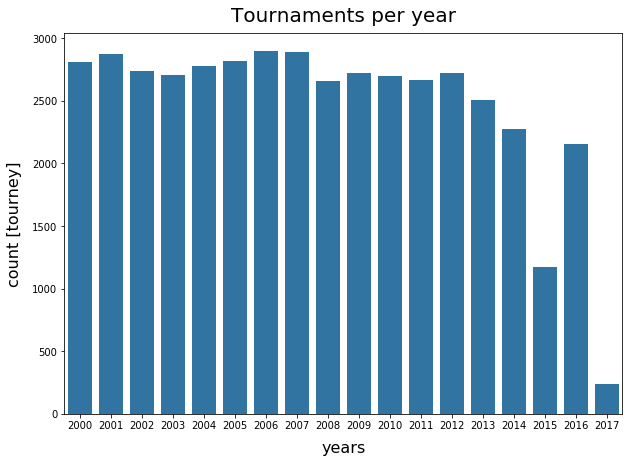

In [96]:
rcParams['figure.figsize'] = 10, 7

base_color = sns.color_palette()[0]
sns.countplot(data=df, x=df['tourney_date'].dt.to_period('Y'), color=base_color)
plt.title('Tournaments per year', fontsize=20, y=1.015)
plt.xlabel('years', labelpad=10, fontsize=16)
plt.ylabel('count [tourney]', labelpad=10, fontsize=16)

Text(0, 0.5, 'count [tourney]')

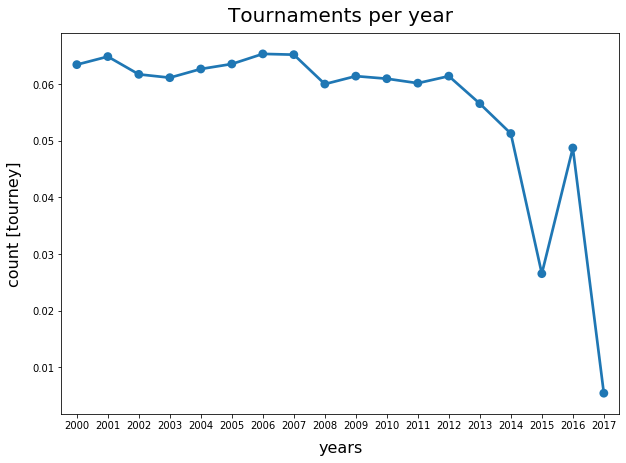

In [97]:
rcParams['figure.figsize'] = 10, 7
events = (df['tourney_date'].dt.to_period('Y').value_counts().sort_index())/df.shape[0]
base_color = sns.color_palette()[0]
sns.pointplot(x=events.index, y= events.values, color=base_color)
plt.title('Tournaments per year', fontsize=20, y=1.015)
plt.xlabel('years', labelpad=10, fontsize=16)
plt.ylabel('count [tourney]', labelpad=10, fontsize=16)

In [98]:
# Payer with most win
DF=df.groupby('winner_name')['winner_name'].count().sort_values(ascending= False)
Df=DF.head(10)
Df=pd.DataFrame(Df)
Df

,winner_name
winner_name,
Roger Federer,984
Rafael Nadal,759
Novak Djokovic,689
David Ferrer,650
Andy Murray,581
Andy Roddick,575
Tomas Berdych,531
Lleyton Hewitt,511
Tommy Robredo,495


Text(0.5, 1.0, 'Total number of wins of top ten winners from 2000 to 2017')

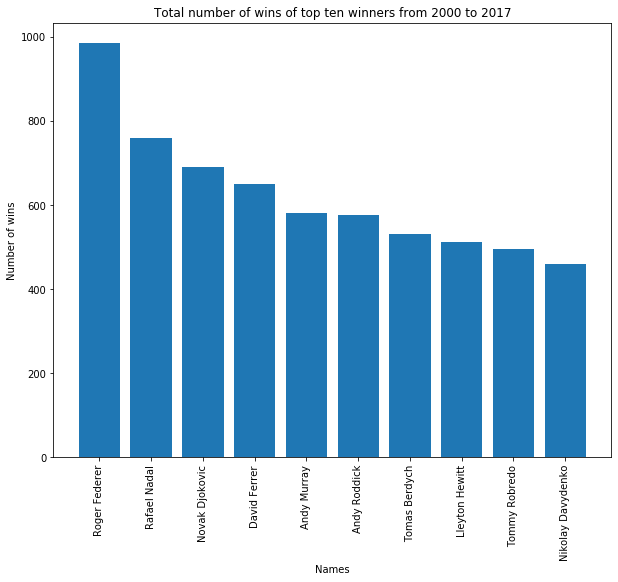

In [99]:
rcParams['figure.figsize'] = 10,8

plt.bar(x=Df.index, height=Df['winner_name']);
plt.xticks(rotation = 90)
plt.xlabel('Names')
plt.ylabel('Number of wins')
plt.title( 'Total number of wins of top ten winners from 2000 to 2017')

In [100]:
#creating dataframe of top ten winners
li = ('Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'David Ferrer', 'Andy Murray', 
      'Andy Roddick', 'Tomas Berdych', 'Lleyton Hewitt', 'Tommy Robredo', 'Nikolay Davydenko')
top = df[df['winner_name'].isin(li)]

In [101]:
L = df[df['winner_hand'] == 'L']['winner_name'].tolist()#saves all leftees in a list
R = df[df['winner_hand'] == 'R']['winner_name'].tolist()

#creating dataframe for by combining both hands
dfnew = pd.concat([pd.DataFrame(L, columns=['Left']), pd.DataFrame(R, columns=['Right'])], axis=1)

#getting unique number of left and right
l = dfnew.Left.unique()
r = dfnew.Right.unique()

#new dataframe from both uniques
dfneww = pd.concat([pd.DataFrame(l, columns=['Left']), pd.DataFrame(r, columns=['Right'])], axis=1)


In [102]:
#creating masks for top ten winners location
Roger_loc = df.winner_ioc[df.winner_name == 'Roger Federer'].values[0]
Rafeal_loc = df.winner_ioc[df.winner_name == 'Rafael Nadal'].values[0]
Novak_loc = df.winner_ioc[df.winner_name == 'Novak Djokovic'].values[0]
David_loc = df.winner_ioc[df.winner_name == 'David Ferrer'].values[0]
AndyR_loc = df.winner_ioc[df.winner_name == 'Andy Roddick'].values[0]
Lleyton_loc = df.winner_ioc[df.winner_name == 'Lleyton Hewitt'].values[0]
AndyM_loc = df.winner_ioc[df.winner_name == 'Andy Murray'].values[0]
Tommy_loc = df.winner_ioc[df.winner_name == 'Tommy Robredo'].values[0]
Tomas_loc = df.winner_ioc[df.winner_name == 'Tomas Berdych'].values[0]
Nikolay_loc = df.winner_ioc[df.winner_name == 'Nikolay Davydenko'].values[0]


In [103]:
#creating mask for top ten winners hand
Roger_hand = df.winner_hand[df.winner_name == 'Roger Federer'].values[0]
Rafeal_hand = df.winner_hand[df.winner_name == 'Rafael Nadal'].values[0]
Novak_hand = df.winner_hand[df.winner_name == 'Novak Djokovic'].values[0]
David_hand = df.winner_hand[df.winner_name == 'David Ferrer'].values[0]
AndyR_hand = df.winner_hand[df.winner_name == 'Andy Roddick'].values[0]
Lleyton_hand = df.winner_hand[df.winner_name == 'Lleyton Hewitt'].values[0]
AndyM_hand = df.winner_hand[df.winner_name == 'Andy Murray'].values[0]
Tommy_hand = df.winner_hand[df.winner_name == 'Tommy Robredo'].values[0]
Tomas_hand = df.winner_hand[df.winner_name == 'Tomas Berdych'].values[0]
Nikolay_hand = df.winner_hand[df.winner_name == 'Nikolay Davydenko'].values[0]


In [104]:
#creating mask for top ten winners height
Roger_ht = df.winner_ht[df.winner_name == 'Roger Federer'].values[0]
Rafeal_ht = df.winner_ht[df.winner_name == 'Rafael Nadal'].values[0]
Novak_ht = df.winner_ht[df.winner_name == 'Novak Djokovic'].values[0]
David_ht = df.winner_ht[df.winner_name == 'David Ferrer'].values[0]
AndyR_ht = df.winner_ht[df.winner_name == 'Andy Roddick'].values[0]
Lleyton_ht = df.winner_ht[df.winner_name == 'Lleyton Hewitt'].values[0]
AndyM_ht = df.winner_ht[df.winner_name == 'Andy Murray'].values[0]
Tommy_ht = df.winner_ht[df.winner_name == 'Tommy Robredo'].values[0]
Tomas_ht = df.winner_ht[df.winner_name == 'Tomas Berdych'].values[0]
Nikolay_ht = df.winner_ht[df.winner_name == 'Nikolay Davydenko'].values[0]


In [105]:
Top_10_location = {'location': (Roger_loc, Rafeal_loc, Novak_loc, David_loc, AndyR_loc, Lleyton_loc, 
                       AndyM_loc, Tommy_loc, Tomas_loc, Nikolay_loc)}
Top_10_location = pd.DataFrame(Top_10_location, index=('Roger', 'Rafeal', 'Novak', 'David', 'AndyR', 'Lleyton', 'AndyM', 'Tommy', 'Tomas', 'NIkolay'), columns=['location'])

Text(0.5, 1.0, 'Countries of the top ten winners')

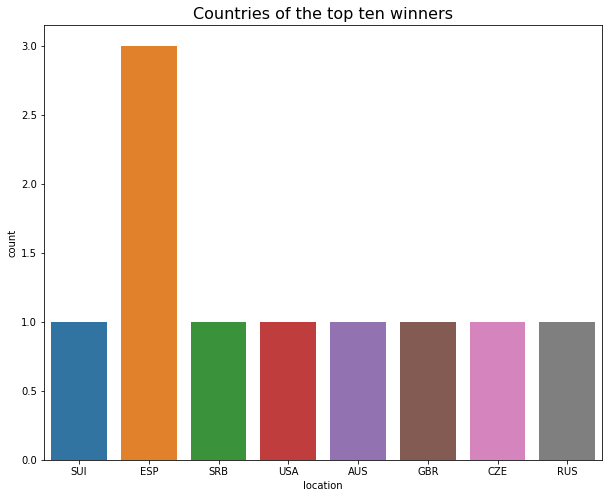

In [106]:
sns.countplot(data=Top_10_location, x = 'location')
plt.title('Countries of the top ten winners', fontsize=16)

In [107]:
Top_10_hand = {'hand': (Roger_hand, Rafeal_hand, Novak_hand, David_hand, AndyR_hand, Lleyton_hand, 
                       AndyM_hand, Tommy_hand, Tomas_hand, Nikolay_hand)}
Top_10_hand = pd.DataFrame(Top_10_hand, index=('Roger', 'Rafeal', 'Novak', 'David', 'AndyR', 'Lleyton', 'AndyM', 'Tommy', 'Tomas', 'NIkolay'), columns=['hand'])

Text(0.5, 1.015, 'Hand of the top ten winners')

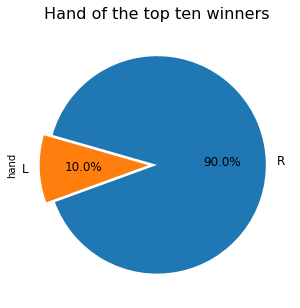

In [108]:
#Plot the pie chart for the top 10 hand
hand_stat = Top_10_hand.hand.value_counts()
hand_stat.plot(kind = 'pie', autopct= '%1.1f%%', startangle = 200, fontsize=12, figsize =(5,5),  explode = (0, 0.08))
plt.title('Hand of the top ten winners', fontsize=16, y=1.015)

#### total number of left hands

In [109]:
tl = 0
for i in dfneww.Left:
    if i is 'Nan':
        pass
    else:
        tl = tl+1
print('TOTAL NUMBER OF LEFT HANDED WINNERS: ', tl)

TOTAL NUMBER OF LEFT HANDED WINNERS:  540


#### total number of right hands

In [110]:
rl = 0
for i in dfneww.Right:
    if i is 'Nan':
        pass
    else:
        tl = tl+1
print('TOTAL NUMBER OF RIGHT HAANDED WINNERS: ', tl)

TOTAL NUMBER OF RIGHT HAANDED WINNERS:  1080


#### hand of top ten winners

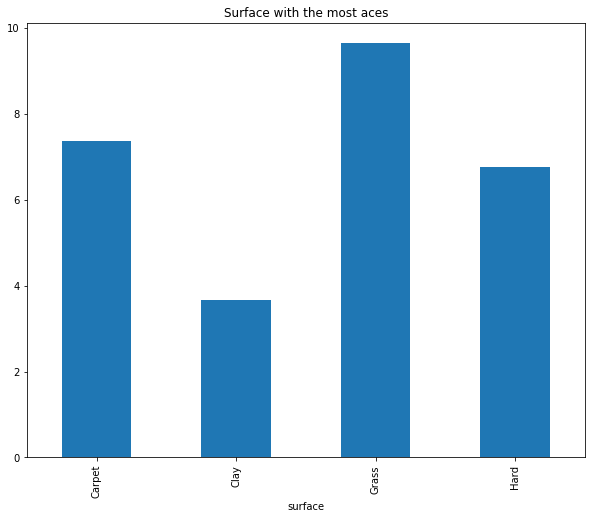

In [111]:
sur = top.groupby('surface')['w_ace'].mean()
sur.plot(kind='bar', title='Surface with the most aces');

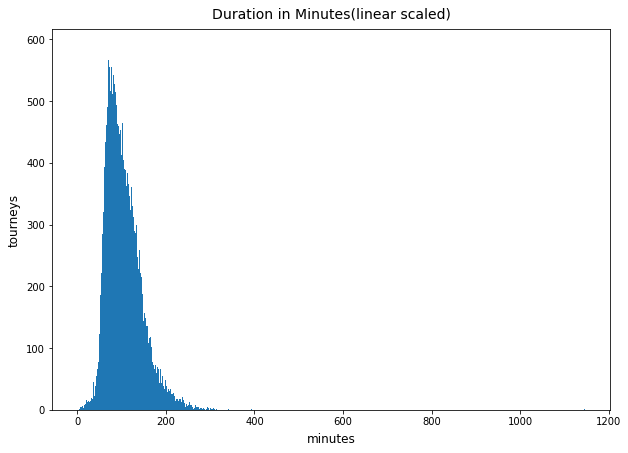

In [112]:
plt.figure(figsize=[10, 7])
bins = np.arange(0, df['minutes'].max()+1, 1)
plt.hist(data = df, x = 'minutes', bins=bins);
plt.title('Duration in Minutes(linear scaled)', fontsize=14, y=1.015)
plt.xlabel('minutes', labelpad=6, fontsize=12)
plt.ylabel('tourneys', labelpad=6, fontsize=12)
plt.show()

## Bivariate analysis

Text(0.5, 1.0, 'Surfaces with the most event')

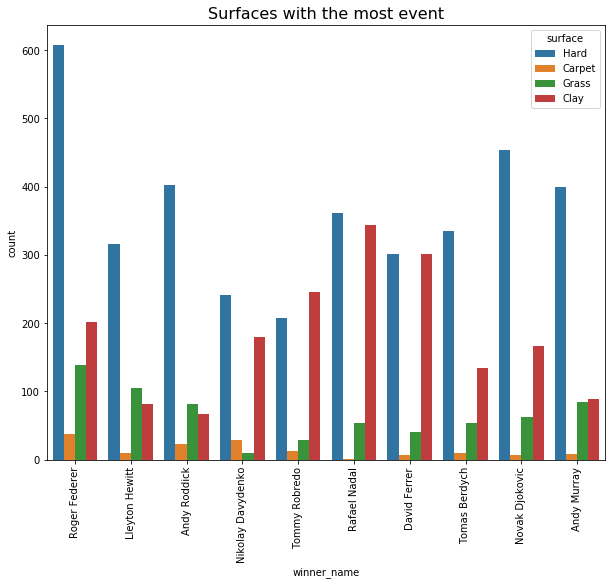

In [113]:
rcParams['figure.figsize']= 10, 8
sns.countplot(data=top, x=top['winner_name'], hue= 'surface');
plt.xticks(rotation='vertical');
plt.title('Surfaces with the most event',fontsize=16)

In [114]:
#making dataframe for top 10 winner height
Top_10_ht = {'height': (Roger_ht, Rafeal_ht, Novak_ht, David_ht, AndyR_ht, Lleyton_ht, 
                       AndyM_ht, Tommy_ht, Tomas_ht, Nikolay_ht),
            'name': ('Roger', 'Rafeal', 'Novak', 'David', 'AndyR', 'Lleyton', 'AndyM', 'Tommy', 'Tomas', 'NIkolay')}
Top_10_ht = pd.DataFrame(Top_10_ht)

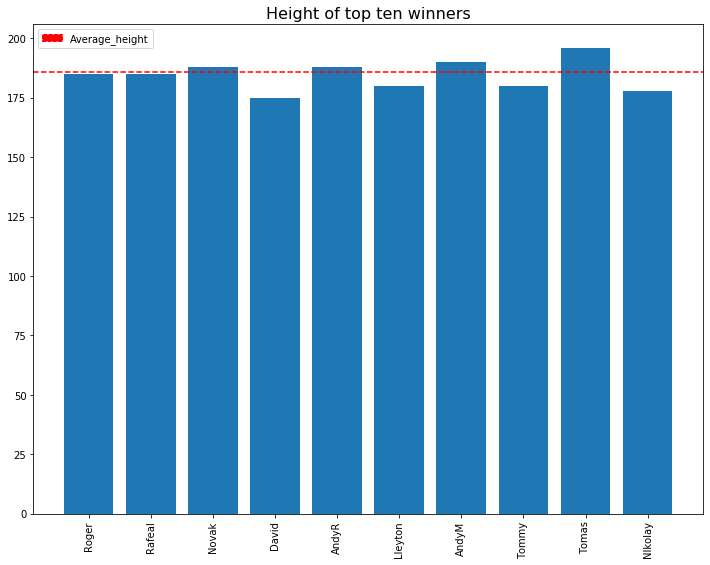

In [115]:
height_total_avr = round(df.winner_ht.mean(), 2)
x = Top_10_ht.name
y = Top_10_ht.height

plt.figure(figsize=(12, 9))
plt.xticks(rotation= 90)
plt.bar(x, y)
plt.axhline(y=height_total_avr, ls='--', color='red')
plt.title('Height of top ten winners', fontsize=16)
custom_legend = mpatches.Patch(color='r', label='Average_height', ls='--')
plt.legend(handles=[custom_legend])

plt.show()

### Multivariate Analysis

In [116]:
#mask for top ten winners
Roger=df[df['winner_name']=='Roger Federer']
Rafael=df[df['winner_name']=='Rafael Nadal']
Novak=df[df['winner_name']=='Novak Djokovic']
R=df[df['winner_name']=='Roger Federer']
Rafael=df[df['winner_name']=='Rafael Nadal']
Novak=df[df['winner_name']=='Novak Djokovic']
Roger=df[df['winner_name']=='Roger Federer']
Rafael=df[df['winner_name']=='Rafael Nadal']
Novak=df[df['winner_name']=='Novak Djokovic']
Roger=df[df['winner_name']=='Roger Federer']

#### SURFACES

##### Roger

In [117]:
Roger_Clay=Roger[Roger['surface']=='Clay']
Roger_Hard=Roger[Roger['surface']=='Hard']
Roger_Grass=Roger[Roger['surface']=='Grass']
Roger_Carpet=Roger[Roger['surface']=='Carpet']
Roger_surface=[Roger_Clay['w_ace'].mean(), Roger_Hard['w_ace'].mean(),Roger_Grass['w_ace'].mean(),Roger_Carpet['w_ace'].mean() ]
Roger_surface=pd.DataFrame(Roger_surface, index=['Clay', 'Hard' ,'Grass','Carpet'], columns=['Average Aces'])

##### Rafael

In [118]:
Rafael_Clay=Rafael[Rafael['surface']=='Clay']
Rafael_Hard=Rafael[Rafael['surface']=='Hard']
Rafael_Grass=Rafael[Rafael['surface']=='Grass']
Rafael_Carpet=Rafael[Rafael['surface']=='Carpet']
Rafael_surface=[Rafael_Clay['w_ace'].mean(), Rafael_Hard['w_ace'].mean(),Rafael_Grass['w_ace'].mean(),Rafael_Carpet['w_ace'].mean()]
Rafael_surface=pd.DataFrame(Rafael_surface, index=['Clay', 'Hard' ,'Grass','Carpet'], columns=['Average Aces'])

##### Novak

In [119]:
Novak_Clay=Novak[Novak['surface']=='Clay']
Novak_Hard=Novak[Novak['surface']=='Hard']
Novak_Grass=Novak[Novak['surface']=='Grass']
Novak_Carpet=Novak[Novak['surface']=='Carpet']
Novak_surface=[Novak_Clay['w_ace'].mean(), Novak_Hard['w_ace'].mean(),Novak_Grass['w_ace'].mean(),Novak_Carpet['w_ace'].mean()]
Novak_surface=pd.DataFrame(Novak_surface, index=['Clay', 'Hard' ,'Grass','Carpet'], columns=['Average Aces'])


##### Overall Winner

In [120]:
Overall_Clay=df[df['surface']=='Clay']
Overall_Hard=df[df['surface']=='Hard']
Overall_Grass=df[df['surface']=='Grass']
Overall_Carpet=df[df['surface']=='Carpet']

Overall_surface=[Overall_Clay['w_ace'].mean(), Overall_Hard['w_ace'].mean(),Overall_Grass['w_ace'].mean(),Overall_Carpet['w_ace'].mean()]
Overall_surface=pd.DataFrame(Overall_surface, index=['Clay', 'Hard' ,'Grass','Carpet'], columns=['Average Aces'])

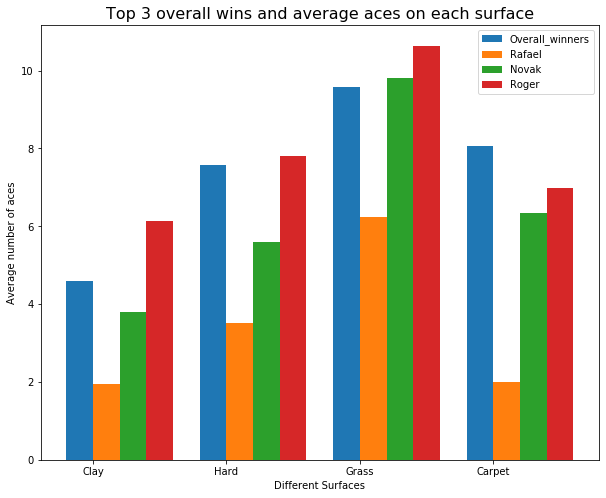

In [127]:
n=4
r=np.arange(n)
width=0.20

plt.bar(r, Overall_surface['Average Aces'], width, label='Overall_winners')
plt.bar(r+width, Rafael_surface['Average Aces'], width, label ='Rafael' )
plt.bar(r+width*2,Novak_surface['Average Aces'], width, label= 'Novak')
plt.bar(r+width*3, Roger_surface['Average Aces'], width, label='Roger')

plt.xlabel('Different Surfaces')
plt.ylabel('Average number of aces')
plt.title('Top 3 overall wins and average aces on each surface', fontsize=16)

plt.xticks(r +width/2,['Clay','Hard','Grass','Carpet'])
plt.legend()

In [122]:
Roger_bpFaced_age=Roger[['winner_age', 'w_bpFaced']].groupby('winner_age')['w_bpFaced'].mean()
Rafael_bpFaced_age=Rafael[['winner_age', 'w_bpFaced']].groupby('winner_age')['w_bpFaced'].mean()
Novak_bpFaced_age=Novak[['winner_age', 'w_bpFaced']].groupby('winner_age')['w_bpFaced'].mean()
Overall_bpFaced_ace_age=df[['winner_age', 'w_bpFaced']].groupby('winner_age')['w_bpFaced'].mean()

Text(0.5, 1.0, 'Age versus the average number of breakpoints faced[top 3]')

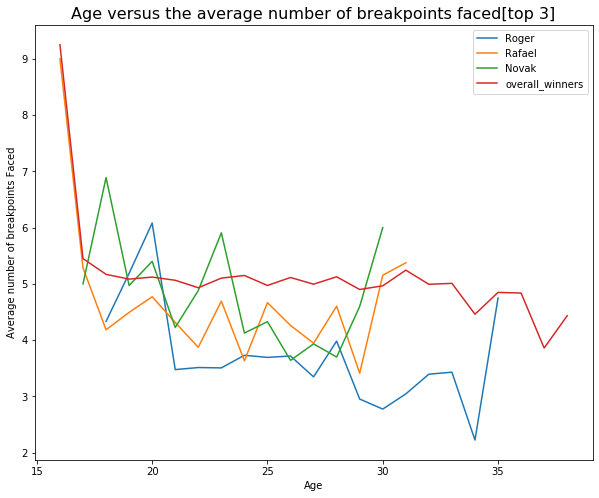

In [125]:
plt.plot(Roger_bpFaced_age, label='Roger')
plt.plot(Rafael_bpFaced_age, label='Rafael')
plt.plot(Novak_bpFaced_age, label='Novak')
plt.plot(Overall_bpFaced_ace_age, label='overall_winners')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Average number of breakpoints Faced')
plt.title('Age versus the average number of breakpoints faced[top 3]', fontsize=16)

In [132]:
#list of the names of our 3 top players
top_players = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']
top_players_data = df[df['winner_name'].isin(top_players)]
df['tourney_year'] = df.tourney_date.dt.year
#total wins of the top 3 winners yearly

print('TOTAL WINS OF THE TOP 3 WINNERS FOR EACH YEAR. \n')
top_players_data.groupby(['winner_name', 'tourney_year'])['tourney_year'].count()


TOTAL WINS OF THE TOP 3 WINNERS FOR EACH YEAR. 



winner_name     tourney_year
Novak Djokovic  2004             1
                2005             9
                2006            35
                2007            65
                2008            62
                2009            78
                2010            54
                2011            70
                2012            75
                2013            67
                2014            61
                2015            40
                2016            65
                2017             7
Rafael Nadal    2002             1
                2003            14
                2004            27
                2005            75
                2006            57
                2007            74
                2008            75
                2009            62
                2010            71
                2011            63
                2012            42
                2013            79
                2014            43
                2015      